In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
from river import evaluate
from river import metrics
from river import stream
from river import tree as river_tree

First download and extract UCI Skin segmentation dataset to DATA_DIR folder
https://archive.ics.uci.edu/dataset/229/skin+segmentation

In [3]:
DATA_DIR = "../../datasets"
df = pd.read_csv(f"{DATA_DIR}/skin+segmentation/Skin_NonSkin.txt", names=["B","G","R","CLASS"], sep="\t")
X = df[["B","G","R"]]
y = df["CLASS"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=2)

In [5]:
X_train

,B,G,R
27784,58,119,183
227737,55,60,21
144796,197,195,160
24015,73,111,165
43514,113,150,218
...,...,...,...
175638,149,152,103
95816,33,34,8
203245,73,75,33
100879,32,33,7


In [6]:
y_train

27784     1
227737    2
144796    2
24015     1
43514     1
         ..
175638    2
95816     2
203245    2
100879    2
89256     2
Name: CLASS, Length: 122528, dtype: int64

In [7]:
model = river_tree.ExtremelyFastDecisionTreeClassifier(
    leaf_prediction = 'mc'
)

In [8]:
metric = metrics.Accuracy()

In [9]:
# Test on small dataset of 2,000 samples (works fine)
evaluate.progressive_val_score(stream.iter_pandas(X_train.iloc[:2000], y_train.iloc[:2000]), model, metric)

Accuracy: 85.74%

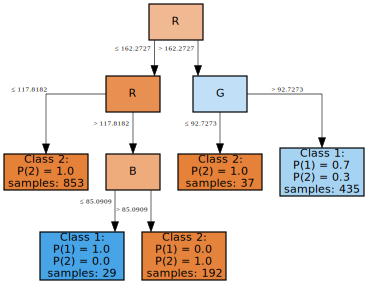

In [10]:
model.draw()

In [11]:
metric = metrics.Accuracy()

In [12]:
model2 = river_tree.ExtremelyFastDecisionTreeClassifier(
    leaf_prediction = 'mc'
)

In [13]:
metric2 = metrics.Accuracy()

In [14]:
# Test on a large dataset of 10,000 samples (triggers bug in EFDT)
evaluate.progressive_val_score(stream.iter_pandas(X_train[:10000], y_train[:10000]), model2, metric2)

/tmp/ipykernel_22874/2654536960.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  evaluate.progressive_val_score(stream.iter_pandas(X_train[:10000], y_train[:10000]), model2, metric2)


TypeError: 'NoneType' object is not iterable

Bugs:
* EFDT fails when trained on large sample of Skin Dataset